### The Logistic Regression Classification involves the following tasks:

Step 1: Quick Overview of the Data Structure

Step 2: Preliminary Clustering Analysis

Step 3: Clustering Model Selection 

Step 4: Model Fine-Turning

Step 5: Finalizing Clusters

Step 6: Cluster Visualization and Dimensionality Reduction by PCA

Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl

Import the training dataset and patient zet array

In [2]:
x = np.load('data/ps3_genetic_fingerprints.npy')
patient_zet = np.load('data/ps3_patient_zet.npy')

### Step 1: Quick Overview of the Data Structure

Print the shape of both training dataset and patient zet's data point. In total, we got around 17K data points for the training data. 

In [3]:
print(x.shape)
print(patient_zet.shape)

(16930, 512)
(512,)


Print the details of the training array. We can see that the training data has a high dimensions (D=512) and is moderately sparse.

In [4]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

For a preliminary visualization of the data structure, we randomly pick three panels for visualizing the training data. The following graphs confirm our previous observation that the dataset is somewhat sparse with 512 dimensions. Certain panels seem to contain more information than other panels. 

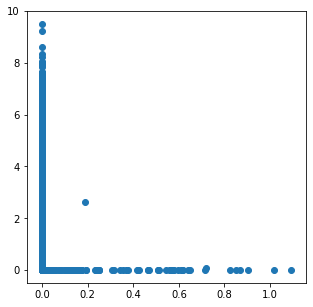

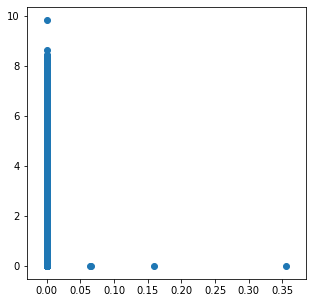

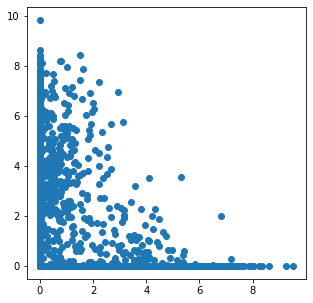

In [12]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.scatter(x[:, 34], x[:, 4], marker="o")
plt.show()

plt.figure(figsize=(5, 5))
ax2 = plt.subplot(111)
ax2.scatter(x[:, 1], x[:, 5], marker="o")
plt.show()

plt.figure(figsize=(5, 5))
ax3 = plt.subplot(111)
ax3.scatter(x[:, 4], x[:, 5], marker="o")
plt.show()

### Step 2: Preliminary Clustering Analysis

In this step, we randomly pick a number of cluster to visualize the clusters after applying kmeans analysis (Geron, 2019). We also print the model's inertia and silhouette scores to have a sense of their ranges respectively (Geron, 2019). 

Since the panel I selected for visualization does not necessarily explain adequate variance of the training data and k=5 might not be the optimal number of clusters that would produce a satisfying clustering result, the following graph does not represent an optimal clustering visualization. 

8235860.066856635
0.35740647
[1 1 4 ... 2 3 3]


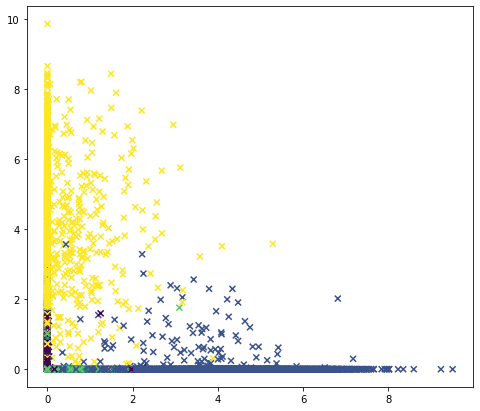

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)

print(kmeans.inertia_)
print(silhouette_score(x, kmeans.labels_))
print(y_pred)

plt.figure(figsize=(8, 7))

ax = plt.subplot(111)
ax.scatter(x[:, 4], x[:, 5], c=y_pred,marker="x")

plt.show()

### Step 3: Clustering Model Selection 

In this step, I ran a series of KMeans algorithms with the cluster numbers range from 1 to 15, calculate all their inertia scores, and plot the inertia curve to identify the elbow in the curve (Geron, 2019). 

K = 15 was selected for the maximum number of clusters because I did not want to generate too many clusters which lose their explanatory power of the training data. Additionally, I want to start with a K value that is not too large to result in a large time consumption for training all KMeans models.

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

Plot a series of inertia scores with respect to kmeans models with k ranges from 1 to 15, and identify k =7 as the elbow of this curve (Geron, 2019). 

From the graph below, we see that K=7 is a distinctive elbow that the model's inertia scores significantly reduces after seven clusters.  

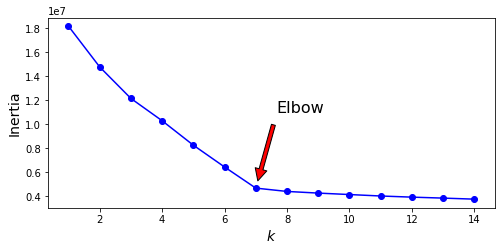

In [19]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(7, inertias[6]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()

Loop through the models generated in the last step and calculate each of their silhouette score to determine the kmeans model with the best performance (Geron, 2019).

In [20]:
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_per_k[1:]]

Plot a series of silhouette scores with respect to kmeans models with k ranges from 2 to 14 (Geron, 2019). 

Consistently, k =7 receives the highest silhouette score, which indicates that most instances are more likely to be inside their own clusters compared to other number of clusters. Thus, the model with K= 7  model would have the best performance for unsupervised training. This result also confirms our previous conclusion made from inertia scores. We could be confident that kmeans with k=7 has a high chance to be the best model for the training data. 

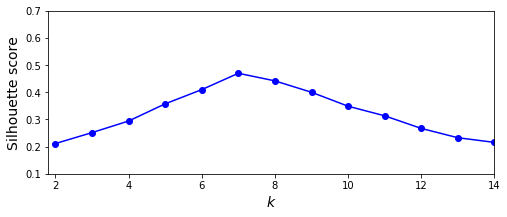

In [21]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 14, 0.1, 0.7])
plt.show()

Loop the plot function of kmeans with 5 to 8 clusters (Geron, 2019). The reason we select the range between 5 and 8 is that kmeans with k =7 seems to have the best performance for the training data. Additionally, we add labels for x and y axis for each silhouette diagram (Geron, 2019). 

In the following graphs, the red dashed lines represent the silhouette score of each algorithm. Both K=4 and K=5 result in clusters that are considerably below the dashed line, which makes them bad clusters because it indicates that the instances of those clusters are too close to other clusters rather than their own cluster (Geron, 2019). 

Alternatively, both K=7 and K=8 have all their clusters passing the dashed lines, indicating a good model performance measured by silhouette scores. However, KMeans with K=7 is slightly better than K=8 because there are most instances that have been wrongly classified and should be included in other clusters when K=8. 

Based on silhouette diagrams, KMeans with K=7 produces the best result which also confirmed my previous observation made from the curves of inertia and silhouette scores.

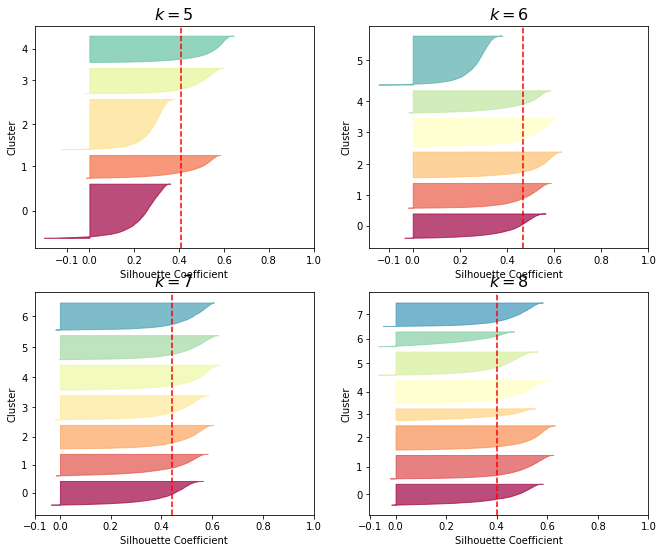

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (5, 6, 7, 8): #plot the silhouette diagrams for 5 to 8 clusters
    plt.subplot(2, 2, k - 4)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x, y_pred)

    padding = len(x) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 6, 7, 8):
        plt.ylabel("Cluster")
    
    if k in (5, 6, 7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Step 4: Model Fine-Turning

Kmeans Sklearn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In this step, I test three different KMeans algorithms (auto, full, and elkan) and two types of initiation methods (random and Kmeans++) to fine-tune the KMeans model as well as double confirm whether K=7 would consistently generate the best model under different parameter settings (Sklearn Documentation, 2020; Geron, 2019). 

The following three pairs of inertia and silhouette curves confirm that k=7 consistently generate the best model when we use different k means algorithsms (Sklearn Documentation, 2020; Geron, 2019). 

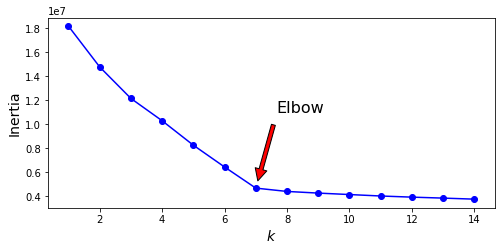

The inertia score for cluster=7 is 4653289.967926914


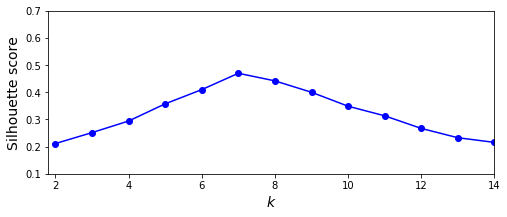

The silhouette score for cluster=7 is 0.46983477


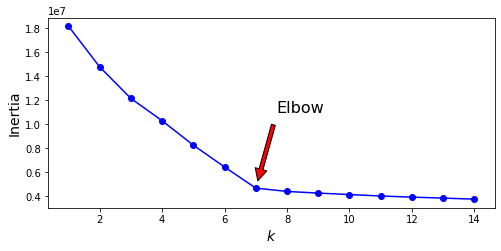

The inertia score for cluster=7 is 4653289.5


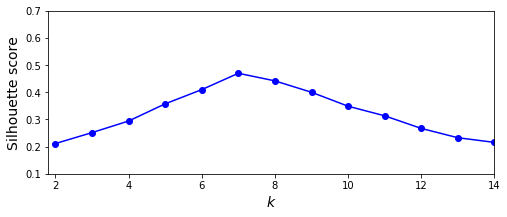

The silhouette score for cluster=7 is 0.46983477


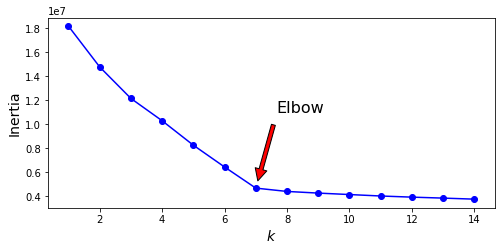

The inertia score for cluster=7 is 4653289.967926914


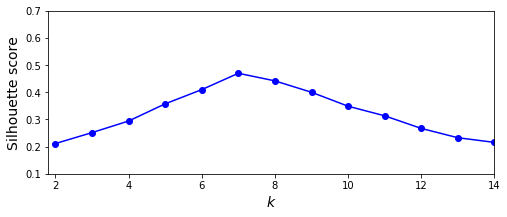

The silhouette score for cluster=7 is 0.46983477


In [23]:
algorithms =['auto', 'full', 'elkan']

for algorithm in algorithms:
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42, algorithm=algorithm).fit(x) for k in range(1, 15)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, 15), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.annotate('Elbow',
                 xy=(7, inertias[6]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='red', shrink=0.1)
                )
    plt.show()
    print("The inertia score for cluster=7 is " + str(inertias[6]))
    
    silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]
    
    plt.figure(figsize=(8, 3))
    plt.plot(range(2, 15), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1.8, 14, 0.1, 0.7])
    plt.show()
    print("The silhouette score for cluster=7 is " + str(silhouette_scores[5]))

The following two pairs of inertia and silhouette curves confirm that k=7 consistently generate the best model when we use different initialization methods (Sklearn Documentation, 2020; Geron, 2019). 

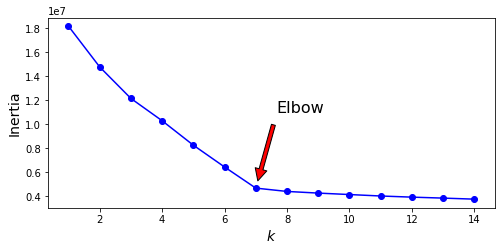

The inertia score for cluster=7 is 4653289.967926914


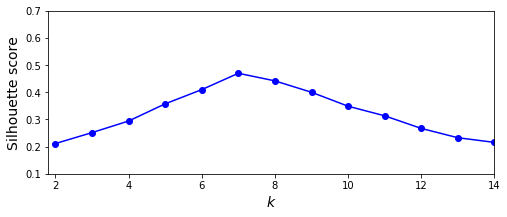

The silhouette score for cluster=7 is 0.46983477


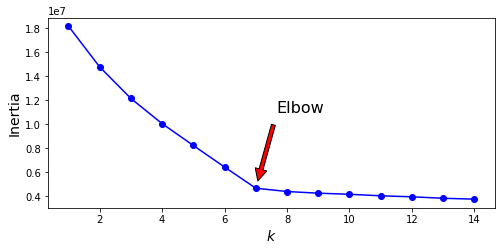

The inertia score for cluster=7 is 4653289.967926914


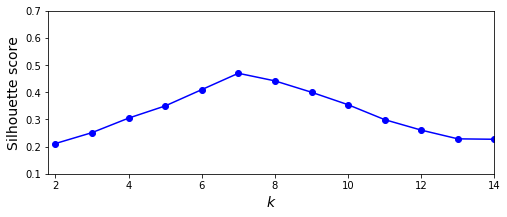

The silhouette score for cluster=7 is 0.46983477


In [24]:
inits=['k-means++', 'random']

for init in inits:
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init=init).fit(x)
                    for k in range(1, 15)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, 15), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.annotate('Elbow',
                 xy=(7, inertias[6]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='red', shrink=0.1)
                )
    plt.show()
    print("The inertia score for cluster=7 is " + str(inertias[6]))
    
    silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]
    
    plt.figure(figsize=(8, 3))
    plt.plot(range(2, 15), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1.8, 14, 0.1, 0.7])
    plt.show()
    print("The silhouette score for cluster=7 is " + str(silhouette_scores[5]))

### Step 5: Finalizing Clusters

In this step, I finalize the parameter setting for the KMeans model. Since different algorithms and initialization methods all identify K=7 as having the best model performance and generate same values of inertia and silhouette scores for K=7, I used the default setting of the KMeans algorithm in Sklearn Python package, 'auto' algorithsm and 'kmeans++' initialization, for determining the final clusters (Sklearn Documentation, 2020; Geron, 2019). I also receive a consistent inertia score (4,653,290) and silhouette score (0.47) with the default setting of the KMeans model. 

In [25]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)

print(kmeans.inertia_)
print(silhouette_score(x, kmeans.labels_))

4653289.967926914
0.46983477


### Step 6: Cluster Visualization and Dimensionality Reduction by PCA

Since the original training data has 512 dimensions, which does not provide much information during visualization, I used Principal Component Analysis (PCA) to first reduce dimensions of the training data and then visualized the clustering result  (Geron, 2019). 

#### Dimensionality Reduction by PCA

Compuate the minimum number of dimensions that are required for the reduced dataset to preserve at least 95% of the training set's variance (Geron, 2019).

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1

Show the number of dimensions after reduced by PCA

In [28]:
d

41

Use plot function to plot cumsum and show the curve of explained variance vs. number of dimensions (Geron, 2019).

The graph shows that the elbow appears when the number of dimensions equal to 41, which means the first 41 dimenions could explain at least 95% of variance in the training data. 

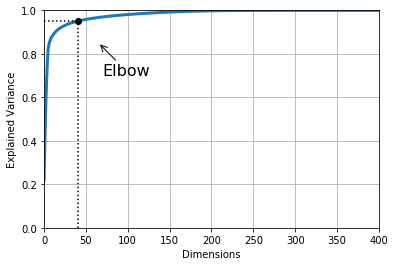

In [29]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Print the cumulative explained variance of the first 41 dimensions. 

From the following array, we see that explained variance increases considerably in the first five to ten dimensions (0.88 at D=10), which means with limited number of panels, I will be able to effectively visualize the clustering result based on the training data reduced by PCA.

In [30]:
cumsum[:41]

array([0.21908823, 0.4071002 , 0.55813855, 0.67305905, 0.7685286 ,
       0.826359  , 0.8473178 , 0.85980207, 0.8697435 , 0.8777928 ,
       0.8833628 , 0.8888699 , 0.8937553 , 0.8982914 , 0.90238166,
       0.9062407 , 0.9097354 , 0.9129655 , 0.91575366, 0.9182997 ,
       0.9207861 , 0.9230764 , 0.92530227, 0.9273964 , 0.9292822 ,
       0.93108493, 0.93280756, 0.934438  , 0.93603235, 0.937534  ,
       0.93896353, 0.9403528 , 0.9416637 , 0.9429068 , 0.94410944,
       0.9452497 , 0.94638   , 0.947443  , 0.94849664, 0.9494845 ,
       0.9504076 ], dtype=float32)

For more robust and consistent dimensionality reduction method, we directly set the threshold of variance we want to preserve to 0.95 in the following equation (Geron, 2019). After reducing the training data from 512 to the final 41 dimensions by PCA, I generated a reduced training data that has an adequate explanatory power that can preserve 95% of variance in the original training data. 

Since the dataset is not that large and the processing time is acceptable, I did not use Randomized PCA or Incremental PCA for saving the processing time.

In [31]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

Print the explained variance of the reduced training data to verify whether it passed 0.95 (Geron, 2019).

In [32]:
np.sum(pca.explained_variance_ratio_)

0.95040756

Print the shape of the training data after we perform dimensionality reduction.

In [34]:
x_reduced.shape

(16930, 41)

Print the numpy array of the training data after the dimensionality reduction. I saw that features with high portion of zero values are more likely to be reduced, and I generated a dataset that is less sparse than the previous one with 512 dimensions.

In [35]:
x_reduced[0]

array([20.468016  , -5.6583652 , -8.864964  , -0.454942  , -0.22736576,
       -9.378457  , -0.69000655, -2.2589328 ,  0.46607444, -1.9612626 ,
        1.271342  , -1.638224  , -1.6174695 , -4.0815344 ,  0.40568036,
        0.8245826 ,  0.4011136 ,  0.4765814 ,  0.9418597 ,  0.6384869 ,
       -1.0497253 ,  0.76589614,  2.6131115 ,  1.1183778 , -1.5207068 ,
       -0.29917052,  0.5400372 ,  0.7138132 , -0.78635603,  1.1773938 ,
        0.8691444 ,  0.5595672 ,  0.22013673, -0.32685235,  1.8883106 ,
       -1.0739685 , -0.17694135,  0.39126772, -0.30909404, -0.54500216,
        2.101461  ], dtype=float32)

#### Cluster Visualization by PCA

Once we have reduced dimensions to 41, we select the first three dimensions that contain the most explained variance and use 3-d visualization to demonstrate the clustering result by different colors (Geron, 2019). 

From the following graph, PCA dimensionality reduction produces a much clearer clustering visualization compared to the previous 2-D graph. Most clusters are distinctive from each other, though the result still gets some overlapped data points between different clusters in the 3-D visualization.

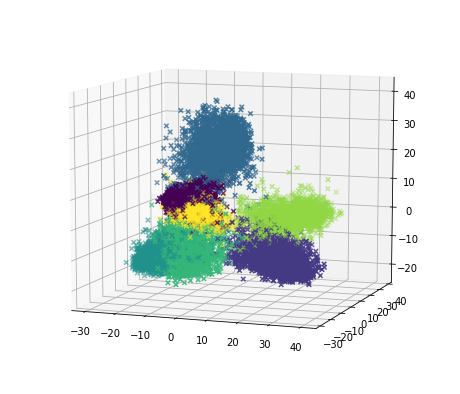

In [36]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8, 7))

ax = plt.subplot(111,projection='3d')
ax.view_init(10, -70)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y_pred, marker="x")

plt.show()

For an even clearer visualization, we select the first three dimensions and three panels that contain the most explained variance and use three 2-d visualizations (one for each panel) to demonstrate the clustering result by different colors (Geron, 2019). 

From the following graph, we see that PCA dimensionality reduction produce a much clearer clustering visualization even in 2-D graphs compared to the previous 2-D graph. Again, most clusters are distinctive from each other in all three visualizing panels, though we still get some overlapped data points between different cluster in 2-D graphs, especially in the first and second panels. 

Overall, we are quite satisfied with this k=7 clustering result based on both 3-D and 2-D visualizations. 

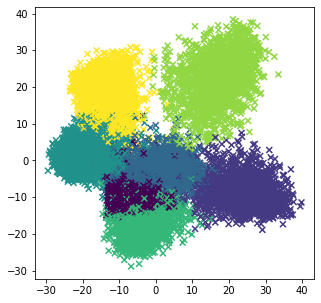

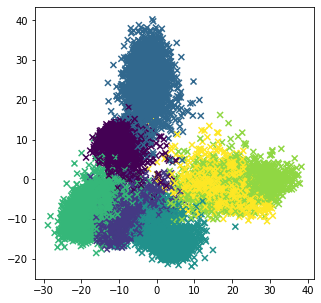

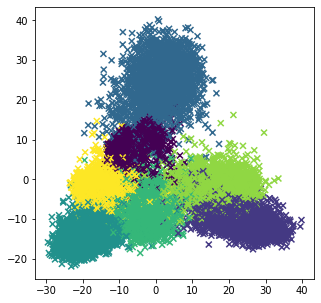

In [37]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_pred, marker="x")
plt.show()

plt.figure(figsize=(5, 5))
ax2 = plt.subplot(111)
ax2.scatter(x_reduced[:, 1], x_reduced[:, 2], c=y_pred, marker="x")
plt.show()

plt.figure(figsize=(5, 5))
ax3 = plt.subplot(111)
ax3.scatter(x_reduced[:, 0], x_reduced[:, 2], c=y_pred, marker="x")
plt.show()

### Step 7: Identify the cluster of patient zet 

Use the selected kmeans model to predict the cluster for patient zet. 

Based on the clustering result, we identify that patient zet belongs to cluster 2.

In [38]:
kmeans.predict([patient_zet])

array([2], dtype=int32)

Show the number of patients in each cluster. We have a roughly even distribution between each cluster. Secifically, cluster 2 has 2421 patients (not counting the patient zet). 

In [39]:
import collections

collections.Counter(y_pred)

Counter({1: 2496, 4: 2384, 3: 2344, 5: 2157, 6: 2412, 0: 2715, 2: 2422})

### Kaggle Prediction

Convert numpy array to a dataframe and illustrate the predicted result for each patient. 

In [40]:
df = pd.DataFrame(data=y_pred, columns=['Predicted'])

To prepare the kaggle submission dataset, we label all patients who belongs to the same cluster as patient zet does to 1, and the rest of patients to 0. 

In [41]:
df=df.rename_axis('Id')
df=df.replace([0, 1, 3, 4, 5, 6], 0)
df=df.replace(2, 1)
df.head()

,Predicted
Id,
0,0
1,0
2,0
3,0
4,0


Export the prediction table for kaggle submission. 

In [42]:
df.to_csv('kaggle_submission.csv')